# carrega bibliotecas

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# carregar base de dados

In [125]:
# carregando dados pela biblioteca do scikit-learn
X, y = load_boston(return_X_y=True)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y_cat = []
for yi in y:
    if yi < 20:
        y_cat.append('cheap')
    elif yi < 35:
        y_cat.append('fair')
    else:
        y_cat.append('expensive')
# to visualize stats let's put numpy into dataframe format
dataset = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1),
                  columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
dataset['cat'] = y_cat

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [126]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,cat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0,fair
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6,fair
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7,fair
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4,fair
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2,expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,22.4,fair
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,20.6,fair
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,23.9,fair
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,22.0,fair


# visualizar dados

In [127]:
# tipos de colunas
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
cat         object
dtype: object

In [128]:
# resumo numérico dos dados (média, desvio padrão, mínimo, máximo)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


In [129]:
# número de exemplos em cada classe
dataset.groupby('cat').size()

cat
cheap        210
expensive     48
fair         248
dtype: int64

# analisar dados

In [130]:
# separar dados entre treino e teste
train, test = train_test_split(dataset, test_size = 0.4, random_state = 42)

In [131]:
# compara as bases de treino
print('Treino:')
print(train.describe())
print(train.groupby('cat').size())

Treino:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.037528    0.123168    0.387111    0.066007    0.345474    0.533374   
std      0.089085    0.237170    0.256040    0.248704    0.237596    0.140527   
min      0.000031    0.000000    0.027493    0.000000    0.000000    0.057865   
25%      0.000816    0.000000    0.163856    0.000000    0.129630    0.447308   
50%      0.002761    0.000000    0.338343    0.000000    0.314815    0.511209   
75%      0.034141    0.200000    0.646628    0.000000    0.498971    0.605480   
max      1.000000    0.950000    1.000000    1.000000    1.000000    1.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.670385    0.247531    0.362175    0.413366    0.600133    0.900853   
std      0.286330  

In [132]:
# compara as bases de treino
print('Test:')
print(test.describe())
print(test.groupby('cat').size())

Test:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean     0.045046    0.099409    0.397745    0.073892    0.354679    0.504697   
std      0.107090    0.227043    0.245003    0.262241    0.240155    0.123661   
min      0.000000    0.000000    0.000000    0.000000    0.014403    0.000000   
25%      0.000905    0.000000    0.199780    0.000000    0.158436    0.442997   
50%      0.002945    0.000000    0.338343    0.000000    0.314815    0.500671   
75%      0.047064    0.000000    0.646628    0.000000    0.491770    0.558824   
max      0.826435    1.000000    1.000000    1.000000    1.000000    0.989462   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean     0.685287    0.234694    0.385950    0.435406    0.656954    0.895157   
std      0.295624    

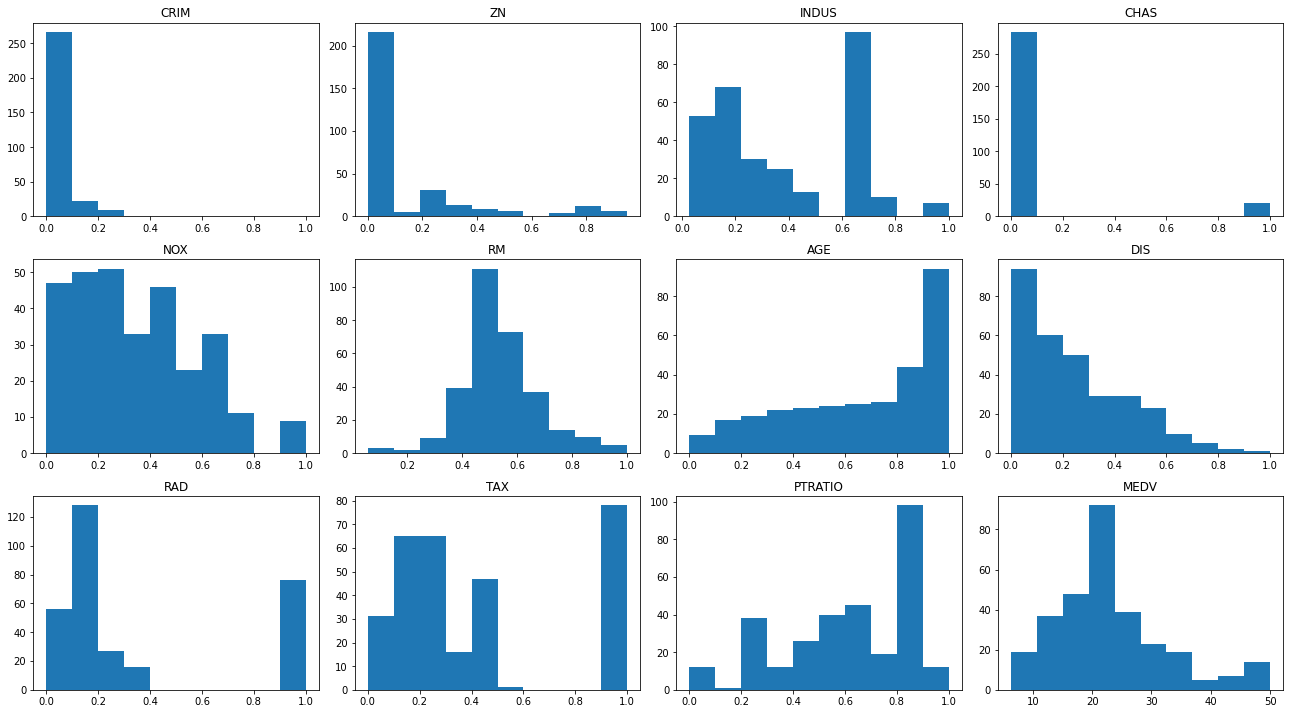

In [133]:
# histograms
n_bins = 10
fn = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','MEDV']
k = 0
fig, axs = plt.subplots(3, 4, figsize=(18,10))
for i in range(3):
    for j in range(4):
        axs[i,j].hist(train[fn[k]], bins = n_bins)
        axs[i,j].set_title(fn[k])
        k += 1
# add some spacing between subplots
fig.tight_layout(pad=1.0);

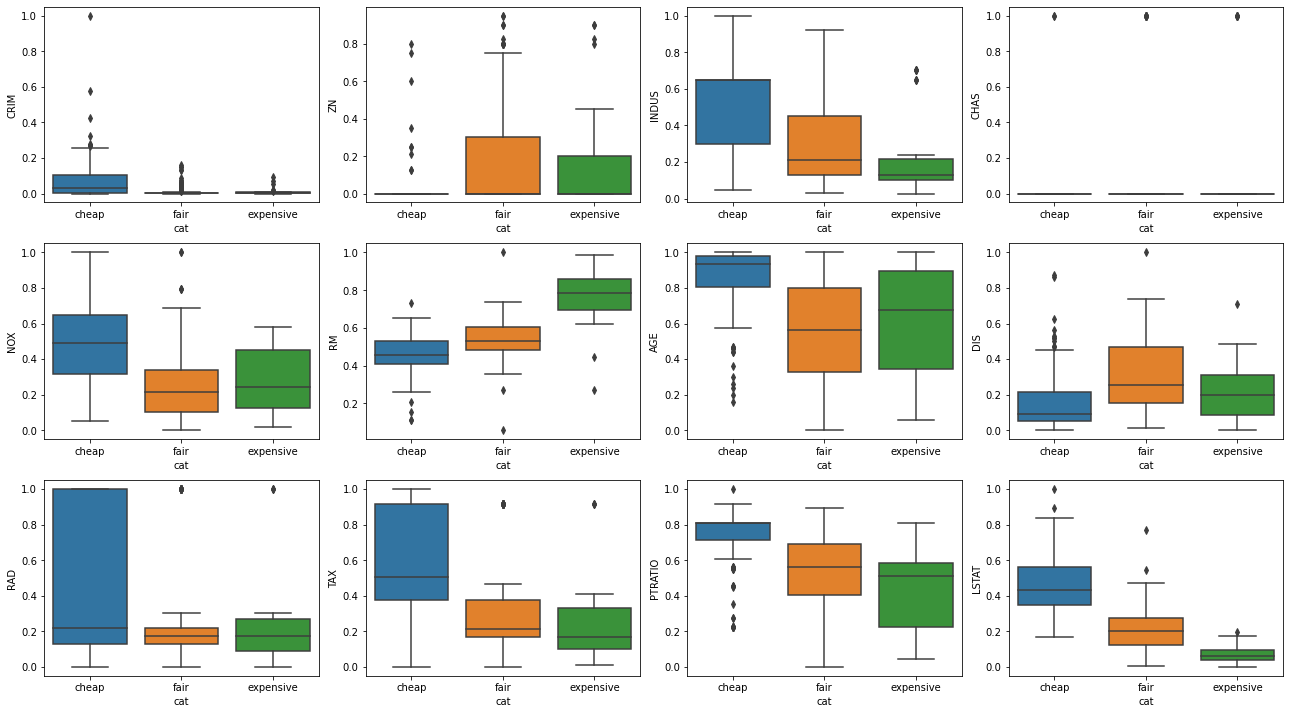

In [134]:
# boxplots using seaborn
k = 0
fig, axs = plt.subplots(3, 4, figsize=(18,10))
fn = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']
cn = ['cheap', 'fair', 'expensive']
for i in range(3):
    for j in range(4):
        sns.boxplot(x = 'cat', y = fn[k], data = train, order = cn, ax = axs[i,j])
        k += 1
# add some spacing between subplots
fig.tight_layout(pad=1.0);

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

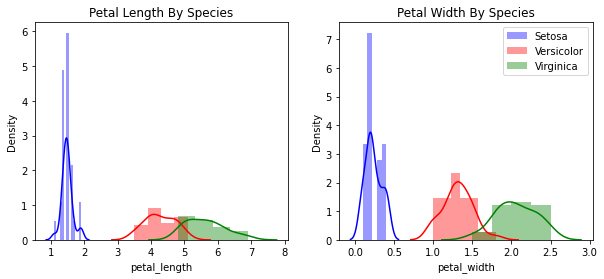

In [12]:
# right off the bat, we see that petal length/width can separate setosa from the others
# histogram by species
setosa_pl = train.loc[train.species=='setosa', 'petal_length']
versicolor_pl = train.loc[train.species=='versicolor', 'petal_length']
virginica_pl = train.loc[train.species=='virginica', 'petal_length']
setosa_pw = train.loc[train.species=='setosa', 'petal_width']
versicolor_pw = train.loc[train.species=='versicolor', 'petal_width']
virginica_pw = train.loc[train.species=='virginica', 'petal_width']

fig, axs = plt.subplots(1, 2)
# set figure size
fig.set_size_inches(10,4)
ax1 = sns.distplot(setosa_pl, color="blue", label="Setosa", ax = axs[0]);
ax1.set_title('Petal Length By Species')
ax1 = sns.distplot(versicolor_pl, color="red", label="Versicolor", ax = axs[0]);
ax1 = sns.distplot(virginica_pl, color="green", label="Virginica", ax = axs[0]);

ax2 = sns.distplot(setosa_pw, color="blue", label="Setosa", ax = axs[1]);
ax2.set_title('Petal Width By Species')
ax2 = sns.distplot(versicolor_pw, color="red", label="Versicolor", ax = axs[1]);
ax2 = sns.distplot(virginica_pw, color="green", label="Virginica", ax = axs[1]);

plt.legend();

# treinamento

In [135]:
# separar entradas e saídas
X_train = train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']]
y_train = train.cat
X_test = test[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']]
y_test = test.cat

In [136]:
# MODELO 1: regressão logística
mod_lr = LogisticRegression(solver = 'newton-cg')
mod_lr.fit(X_train, y_train)
y_train_hat = mod_lr.predict(X_train)
acc = metrics.accuracy_score(y_train_hat,y_train)
print('Accuracy of Logistic Regression in the training set:',"{:.3f}".format(acc))

Accuracy of Logistic Regression in the training set: 0.795


In [137]:
# MODELO 2: SVM com kernel linear
mod_svm = SVC(kernel='linear')
mod_svm.fit(X_train, y_train)
y_train_hat = mod_svm.predict(X_train)
acc = metrics.accuracy_score(y_train_hat,y_train)
print('Accuracy of Linear SVM in the training set:',"{:.3f}".format(acc))

Accuracy of Linear SVM in the training set: 0.822


In [138]:
# MODELO 3: árvore de decisão
mod_dt = DecisionTreeClassifier(max_depth=3, random_state = 1)
mod_dt.fit(X_train,y_train)
acc = metrics.accuracy_score(y_train_hat,y_train)
print('Accuracy of decision tree classifier in the training set:',"{:.3f}".format(acc))

Accuracy of decision tree classifier in the training set: 0.822


# teste dos modelos

The accuracy of Logistic Regression is 0.768


/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


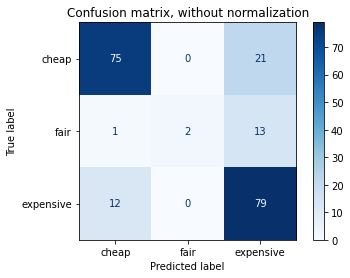

In [139]:
y_test_hat = mod_lr.predict(X_test)
acc = metrics.accuracy_score(y_test_hat,y_test)
print('The accuracy of Logistic Regression is',"{:.3f}".format(acc))
# confusion matrix one versicolor misclassified
disp = metrics.plot_confusion_matrix(mod_lr, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix, without normalization');

The accuracy of Linear SVM is 0.778


/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


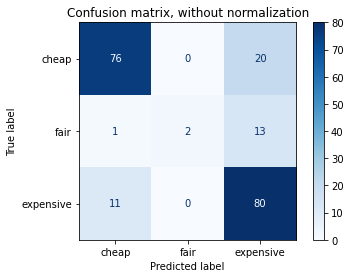

In [140]:
y_test_hat = mod_svm.predict(X_test)
acc = metrics.accuracy_score(y_test_hat,y_test)
print('The accuracy of Linear SVM is',"{:.3f}".format(acc))
disp = metrics.plot_confusion_matrix(mod_svm, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix, without normalization');

The accuracy of Decision Tree Classifier is 0.798


/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


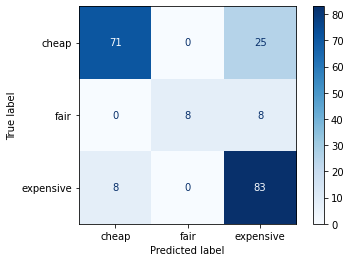

In [141]:
y_test_hat = mod_dt.predict(X_test)
acc = metrics.accuracy_score(y_test_hat,y_test)
print('The accuracy of Decision Tree Classifier is',"{:.3f}".format(acc))
isp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix, without normalization');

# observando overfitting, underfitting e ajuste de hiperparâmetros

In [142]:
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.datasets import load_iris
# carregando dados pela biblioteca do scikit-learn
X, y = load_iris(return_X_y=True)
#X=X_train.to_numpy()
#y = pd.Categorical(y_train).codes

In [26]:
# observando a importância do tamanho da base de dados
sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
# MODELO 1
train_sizes, train_scores_model1, valid_scores_model1 = learning_curve(
    mod_lr,
    X, y,
    train_sizes=sizes,
    cv=5)
# MODELO 2
train_sizes, train_scores_model2, valid_scores_model2 = learning_curve(
    mod_svm,
    X, y,
    train_sizes=sizes,
    cv=5)
# MODELO 3
train_sizes, train_scores_model3, valid_scores_model3 = learning_curve(
    mod_dt,
    X, y,
    train_sizes=sizes,
    cv=5)

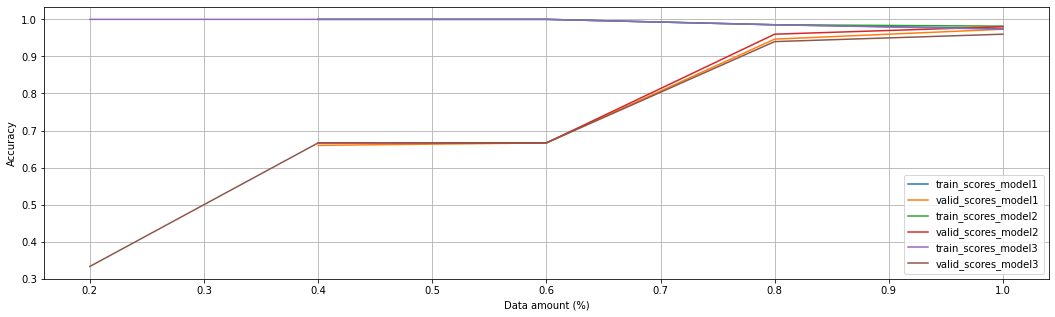

In [27]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(sizes,np.mean(train_scores_model1, axis=1))
ax.plot(sizes,np.mean(valid_scores_model1, axis=1))
ax.plot(sizes,np.mean(train_scores_model2, axis=1))
ax.plot(sizes,np.mean(valid_scores_model2, axis=1))
ax.plot(sizes,np.mean(train_scores_model3, axis=1))
ax.plot(sizes,np.mean(valid_scores_model3, axis=1))
plt.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
plt.grid()
plt.xlabel('Data amount (%)')
plt.ylabel('Accuracy')
plt.show()

In [28]:
# observando a importância do ajuste dos hiperparâmetros
train_scores_model1, valid_scores_model1 = validation_curve(
    mod_lr,
    X, y,
    param_name="C",
    param_range=np.linspace(0.1, 1, 10),
    cv=5)
train_scores_model2, valid_scores_model2 = validation_curve(
    mod_svm,
    X, y,
    param_name="C",
    param_range=np.linspace(0.1, 1, 10),
    cv=5)
train_scores_model3, valid_scores_model3 = validation_curve(
    mod_dt,
    X, y,
    param_name="min_weight_fraction_leaf",
    param_range=np.linspace(0, 0.1, 10),
    cv=5)

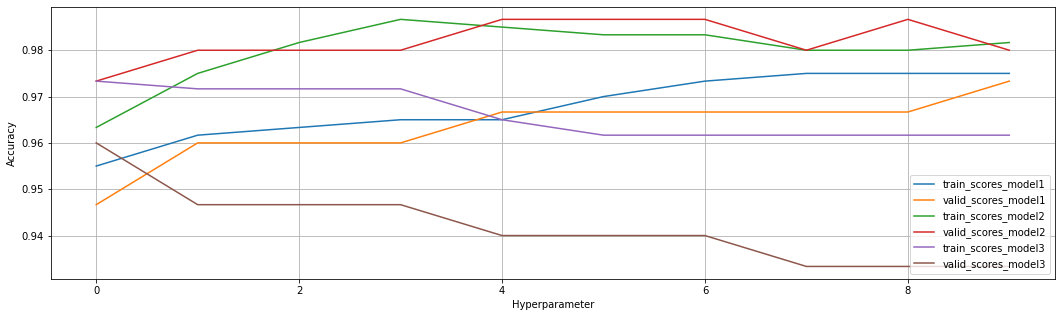

In [29]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(np.mean(train_scores_model1, axis=1))
ax.plot(np.mean(valid_scores_model1, axis=1))
ax.plot(np.mean(train_scores_model2, axis=1))
ax.plot(np.mean(valid_scores_model2, axis=1))
ax.plot(np.mean(train_scores_model3, axis=1))
ax.plot(np.mean(valid_scores_model3, axis=1))
plt.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
plt.grid()
plt.xlabel('Hyperparameter')
plt.ylabel('Accuracy')
plt.show()